In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Tensorflow version : {}".format(tf.__version__))
print("Numpy version : {}".format(np.__version__))
print("Pandas version : {}".format(pd.__version__))

Tensorflow version : 2.7.0
Numpy version : 1.22.1
Pandas version : 1.4.0


In [16]:
from pathlib import Path
DATASET_PATH = Path.cwd().parent / "cleaned_data.csv"
print(f"dataset path : {DATASET_PATH}")

def shuffle(df, n_iter=10):
    df = df.copy()
    for _ in range(n_iter):
        df = df.sample(frac=1)

    return df.reset_index(drop=True)

cols = ['Name', 'style', 'Exterior_color', 'interior_color', 'Engine',
       'drive_type', 'Fuel_Type', 'Transmission', 'Mileage', 'mpg_city',
       'mpg_highway', 'price', 'Year', 'Engine_V', 'Brand']

cars = pd.read_csv(DATASET_PATH, names=cols)
cars = shuffle(cars, n_iter=10)
print(f"datset shape : {cars.shape}")
cars.head(3)

dataset path : c:\Users\Sina\Desktop\car-price-predictor\Notebooks\cleaned_data.csv
datset shape : (6533, 15)


,Name,style,Exterior_color,interior_color,Engine,drive_type,Fuel_Type,Transmission,Mileage,mpg_city,mpg_highway,price,Year,Engine_V,Brand
0,F-150,Pickup Truck,Magnetic Metallic,Medium Earth Gray,V-6 Gas Turbocharged,4WD,Gas,Automatic,100139,17,23,30677,2017,3.5,Ford
1,F-150,Pickup Truck,Magnetic Metallic,Medium Earth Gray,V-6 Gas Turbocharged,4WD,Gas,Automatic,49001,17,23,33762,2017,2.7,Ford
2,Explorer,SUV,White Platinum Metallic Tri-Coat,Ebony Black,V-4 Gas Turbocharged,4WD,Gas,Automatic,23484,16,22,32995,2018,2.3,Ford


In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6533 entries, 0 to 6532
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            6292 non-null   object
 1   style           6533 non-null   object
 2   Exterior_color  6533 non-null   object
 3   interior_color  6533 non-null   object
 4   Engine          6533 non-null   object
 5   drive_type      6533 non-null   object
 6   Fuel_Type       6533 non-null   object
 7   Transmission    6533 non-null   object
 8   Mileage         6533 non-null   object
 9   mpg_city        6533 non-null   object
 10  mpg_highway     6533 non-null   object
 11  price           6533 non-null   object
 12  Year            6533 non-null   object
 13  Engine_V        6533 non-null   object
 14  Brand           6533 non-null   object
dtypes: object(15)
memory usage: 765.7+ KB


In [18]:
cars = cars.dropna().reset_index(drop=True)
cars.shape

(6292, 15)

In [19]:
i = cars[cars.Mileage.str.isdigit() == False].index
print(f"none-numeric value available with index(s) : {i}")
cars.drop(i, axis=0, inplace=True)
print(f"dataet shape : {cars.shape}")

none-numeric value available with index(s) : Int64Index([1216], dtype='int64')
dataet shape : (6291, 15)


In [20]:
cars = cars.astype({"Mileage" : np.int32, "mpg_city" : np.int8, "mpg_highway" : np.int8,
                    "price" : np.int32, "Year" : np.int32, "Engine_V" : np.float32})

In [21]:
cars.describe(include="all")

,Name,style,Exterior_color,interior_color,Engine,drive_type,Fuel_Type,Transmission,Mileage,mpg_city,mpg_highway,price,Year,Engine_V,Brand
count,6291,6291,6291,6291,6291,6291,6291,6291,6291.000000,6291.000000,6291.000000,6291.000000,6291.000000,6291.000000,6291
unique,268,9,526,305,30,4,3,2,NaN,NaN,NaN,NaN,NaN,NaN,43
top,F-150,SUV,Black,Black,Inline-4 Gas,FWD,Gas,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,Ford
freq,1238,2084,447,2112,1682,2628,6236,6172,NaN,NaN,NaN,NaN,NaN,NaN,2017
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63799.074710,21.384677,28.478779,26076.222222,2017.224130,2.963853,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42846.042218,5.059630,6.257535,11087.348287,3.010157,1.187808,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.000000,10.000000,16.000000,2000.000000,1997.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32078.000000,18.000000,23.000000,17990.000000,2017.000000,2.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52443.000000,20.000000,27.000000,24999.000000,2018.000000,2.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86788.000000,25.000000,34.000000,33951.500000,2019.000000,3.600000,NaN


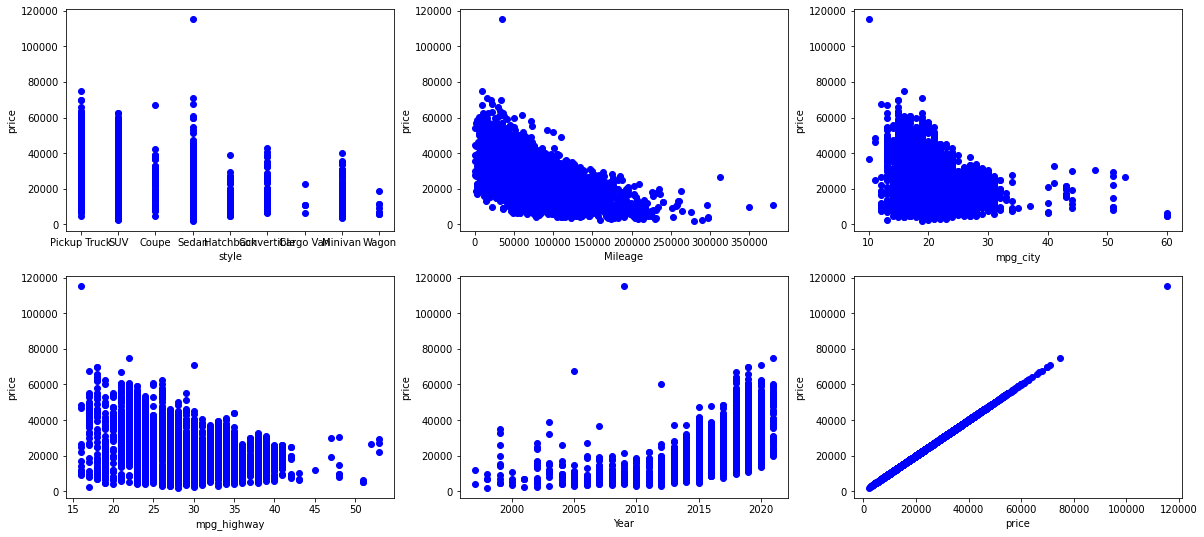

In [22]:
fig , axes = plt.subplots(nrows=2, ncols=3, figsize=(20,9))

target = cars["price"]
features = ['style', 'Mileage', 'mpg_city',
            'mpg_highway', 'Year', 'price']

axes = axes.flatten()
for i in range(6):
    feature = features[i]
    axes[i].plot(cars[feature], target, "bo")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("price")

plt.show()

In [23]:
TRAIN_SIZE = 0.80
number_of_samples = cars.shape[0]
number_of_training_samples = int(np.ceil(number_of_samples * TRAIN_SIZE))

df_train = cars.iloc[:number_of_training_samples , :]
df_eval  = cars.iloc[number_of_training_samples : , :]

print(f"Training Dataset shape : {df_train.shape}")
print(f"Testing Dataset shape : {df_eval.shape}")

Training Dataset shape : (5033, 15)
Testing Dataset shape : (1258, 15)


In [24]:
columns = cars.columns
columns

Index(['Name', 'style', 'Exterior_color', 'interior_color', 'Engine',
       'drive_type', 'Fuel_Type', 'Transmission', 'Mileage', 'mpg_city',
       'mpg_highway', 'price', 'Year', 'Engine_V', 'Brand'],
      dtype='object')

In [25]:
categorical_columns = ['Name', 'style', 'Exterior_color', 'interior_color', 'Engine',
                       'drive_type', 'Fuel_Type', 'Transmission', 'Brand']
numerical_columns = ['Mileage', 'mpg_city',
                     'mpg_highway', 'Year', 'Engine_V']

categorical_features = list()
categorical_indicator_features = list()
for col_name in categorical_columns:
    vocabulary =  cars[col_name].unique()
    category = tf.feature_column.categorical_column_with_vocabulary_list(key=col_name,
                                                                         vocabulary_list=vocabulary,)
    indicator_column = tf.feature_column.indicator_column(category)   
    categorical_features.append(category)
    categorical_indicator_features.append(indicator_column)

numerical_features = list()
for col_name in numerical_columns:
    numerical_features.append(
        tf.feature_column.numeric_column(key=col_name, dtype=tf.float32))

feature_columns = categorical_features + numerical_features
indicator_feature_columns = categorical_indicator_features + numerical_features

print(f"number of categorical features : {len(categorical_features)}")
print(f"number of numerical features : {len(numerical_features)}")
print(f"total number of columns : {len(feature_columns)}")

number of categorical features : 9
number of numerical features : 5
total number of columns : 14


In [29]:
def standard_scaler(arr):
    mean = np.mean(arr)
    std  = np.std(arr)
    
    return (arr - mean) / std


def train_input_fn():
    df = df_train.copy()
    data_df, label_df = df, df.pop("price")
    # data_df = standard_scaler(data_df)

    dataset = tf.data.Dataset.from_tensor_slices(
        (dict(data_df), label_df)
    )
    if shuffle:
        dataset = dataset.shuffle(1000)
    dataset = dataset.batch(32)
    return dataset

def test_input_fn():
    df = df_eval.copy()
    data_df, label_df = df, df.pop("price")
    # data_df = standard_scaler(data_df)

    dataset = tf.data.Dataset.from_tensor_slices(
        (dict(data_df), label_df)
    )
    if shuffle:
        dataset = dataset.shuffle(1000)
    dataset = dataset.batch(32)
    return dataset

In [30]:
linear_model = tf.estimator.LinearRegressor(feature_columns=feature_columns,
                                            model_dir=Path.cwd() / "LinearRegressor")
linear_model.train(input_fn=train_input_fn)
result = linear_model.evaluate(input_fn=test_input_fn)

print(result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'c:\\Users\\Sina\\Desktop\\car-price-predictor\\Notebooks\\deep-learning-approach\\LinearRegressor', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


C:\Users\Sina\AppData\Roaming\Python\Python39\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into c:\Users\Sina\Desktop\car-price-predictor\Notebooks\deep-learning-approach\LinearRegressor\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 840191600.0, step = 0
INFO:tensorflow:global_step/sec: 211.101
INFO:tensorflow:loss = 364452740.0, step = 100 (0.475 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 158...
INFO:tensorflow:Saving checkpoints for 158 into c:\Users\Sina\Desktop\car-price-predictor\Notebooks\deep-learning-approach\LinearRegressor\model.ckpt.
INFO:ten

C:\Users\Sina\AppData\Roaming\Python\Python39\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-19T10:35:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from c:\Users\Sina\Desktop\car-price-predictor\Notebooks\deep-learning-approach\LinearRegressor\model.ckpt-158
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.75553s
INFO:tensorflow:Finished evaluation at 2022-02-19-10:35:22
INFO:tensorflow:Saving dict for global step 158: average_loss = 314287780.0, global_step = 158, label/mean = 26008.025, loss = 310252600.0, prediction/mean = 17771.414
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 158: c:\Users\Sina\Desktop\car-price-predictor\Notebooks\deep-learning-approach\LinearRegressor\model.ckpt-158
{'average_loss': 314287780.0, 'label/mean': 26008.025, 'loss': 310252600.0, 'prediction/mean': 17771.414, 'global_step': 158}


In [31]:
dnn_regressor = tf.estimator.DNNRegressor(hidden_units=[4,4],
                                          feature_columns=indicator_feature_columns,
                                          model_dir=Path.cwd() / "DNNRegressor")
dnn_regressor.train(input_fn=train_input_fn)
result = dnn_regressor.evaluate(input_fn=test_input_fn)

print(print(result))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'c:\\Users\\Sina\\Desktop\\car-price-predictor\\Notebooks\\deep-learning-approach\\DNNRegressor', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INF